<a href="https://colab.research.google.com/github/acho110/Projects-Resume/blob/main/Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline
from tensorflow.keras import regularizers


In [2]:
df = pd.read_csv('topic3-spiral.csv')
print(df)

            x         y  arm
0    0.361659 -1.815359    0
1   -0.080207  0.467795    0
2   -1.236511 -0.940904    0
3   -0.568537  0.013438    0
4   -0.004653 -0.019253    0
..        ...       ...  ...
395 -1.014665  1.514116    1
396 -1.693976  0.881458    1
397 -1.601562  1.037324    1
398  1.447972 -0.256827    1
399  0.329707 -0.285806    1

[400 rows x 3 columns]


In [3]:
pd.DataFrame(df)

,x,y,arm
0,0.361659,-1.815359,0
1,-0.080207,0.467795,0
2,-1.236511,-0.940904,0
3,-0.568537,0.013438,0
4,-0.004653,-0.019253,0
...,...,...,...
395,-1.014665,1.514116,1
396,-1.693976,0.881458,1
397,-1.601562,1.037324,1
398,1.447972,-0.256827,1


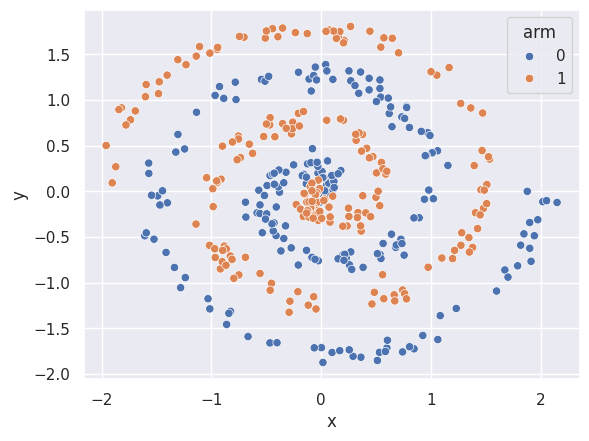

In [4]:
sns.scatterplot(data=df,x='x',y='y',hue='arm');

In [8]:
NNmodel_adam = tf.keras.models.Sequential([
    tf.keras.layers.Input((2,)),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(2,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])


NNmodel_adam.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # tells the code which optimizer to use and define lambda
              loss='binary_crossentropy',
              metrics=['accuracy']) # as it goes, write down how accurate this model is

NNmodel_adam.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 64)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2)                   │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,417 (5.54 KB)

 Trainable params: 1,417 (5.54 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# pre processing
xtrain = np.zeros((df.shape[0],2))
xtrain[:,0] = df['x']
xtrain[:,1] = df['y']
ytrain = df['arm']

In [11]:
import time
start_time = time.time()

history = NNmodel_adam.fit(
    xtrain,
    ytrain,
    epochs=350,
    batch_size=20,
    validation_split=0.20,
    verbose=1
)

end_time = time.time()

elapsed_time = end_time - start_time # the elapsed time, how computationally costly

training_accuracies = history.history['accuracy']
validation_accuracies = history.history['val_accuracy']

avg_training_accuracy = sum(training_accuracies) / len(training_accuracies) # find avgs
avg_validation_accuracy = sum(validation_accuracies) / len(validation_accuracies)

print(f"Average Training Accuracy: {avg_training_accuracy:.4f}")
print(f"Average Validation Accuracy: {avg_validation_accuracy:.4f}")
print(f"Time Elapsed: {elapsed_time:.2f} seconds")

Epoch 1/350
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8824 - loss: 0.2833 - val_accuracy: 0.9625 - val_loss: 0.2832
Epoch 2/350
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8177 - loss: 0.3780 - val_accuracy: 0.9750 - val_loss: 0.2422
Epoch 3/350
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8889 - loss: 0.2848 - val_accuracy: 0.9750 - val_loss: 0.2571
Epoch 4/350
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8583 - loss: 0.3217 - val_accuracy: 0.9750 - val_loss: 0.2556
Epoch 5/350
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8851 - loss: 0.3063 - val_accuracy: 0.9000 - val_loss: 0.3762
Epoch 6/350
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7625 - loss: 0.4723 - val_accuracy: 0.9375 - val_loss: 0.2894
Epoch 7/350
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8106 - loss: 0.4297 - val_accuracy: 0.9500 - val_loss: 0.2986
Epoch 8/350
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8772 - loss: 0.3431 - val_accuracy: 1.0000 - 

In [13]:
df_test = pd.read_csv('xy_locs.csv')
X_test = df_test[['x', 'y']].values
preds = (NNmodel_adam.predict(X_test) > .5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


In [14]:
preds

array([[1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0]])

82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


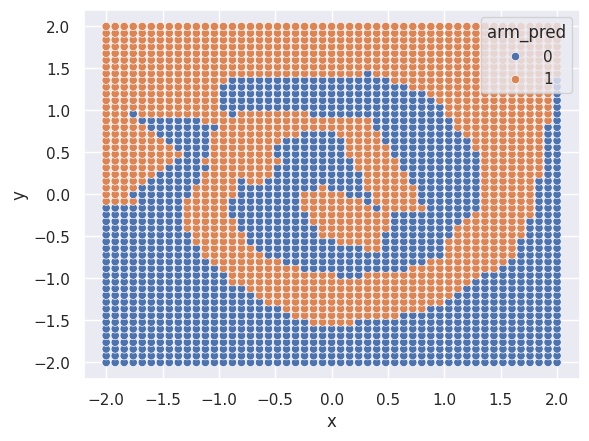

In [17]:
grid = np.linspace(-2,2,num=51)
xg = np.zeros(51**2)
yg = np.zeros(51**2)
k=0
for x in range(51):
    for y in range(51):
        xg[k]=grid[x]
        yg[k]=grid[y]
        k+=1

xy = np.zeros((51**2,2))
xy[:,0]=xg
xy[:,1]=yg

pred = (NNmodel_adam.predict(xy)> 0.5).astype(int)

df_grid = pd.DataFrame({'x':xg,'y':yg,'arm_pred':pred.transpose()[0]})
sns.scatterplot(data=df_grid,x='x',y='y',hue='arm_pred');